In [ ]:
# testing examples for notes

In [219]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Text(0.5, 1.0, 'Outcome of 10000 Dice Rolls')

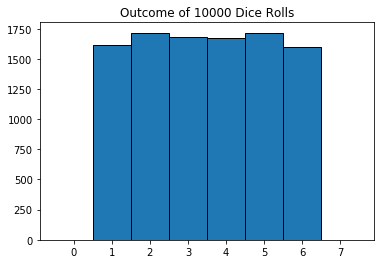

In [168]:
x = stats.randint(1,7).rvs((10000))

plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of 10000 Dice Rolls')

(array([0.000e+00, 3.000e+00, 1.600e+01, 7.700e+01, 1.980e+02, 4.590e+02,
        8.720e+02, 1.146e+03, 1.517e+03, 1.595e+03, 1.393e+03, 1.076e+03,
        7.910e+02, 4.590e+02, 2.360e+02, 1.120e+02, 2.900e+01, 1.500e+01,
        3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

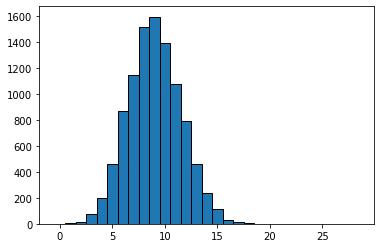

In [163]:
x = stats.binom(30,.3).rvs(10000)

plt.hist(x, bins=range(0, 30), align='left', width=1, edgecolor='black')

(array([ 14.,  45., 132., 235., 262., 203.,  79.,  23.,   6.,   1.]),
 array([ 5.55536309,  8.96647744, 12.37759178, 15.78870613, 19.19982048,
        22.61093483, 26.02204918, 29.43316353, 32.84427788, 36.25539223,
        39.66650658]),
 <a list of 10 Patch objects>)

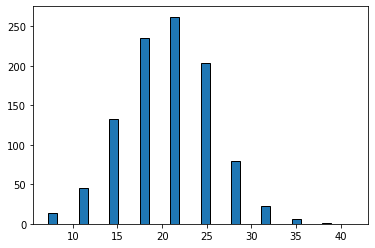

In [161]:
x = stats.norm(20,5).rvs(1000)

plt.hist(x, align = 'right',width=1, edgecolor='black')

(array([169., 171., 164., 165., 169., 162.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

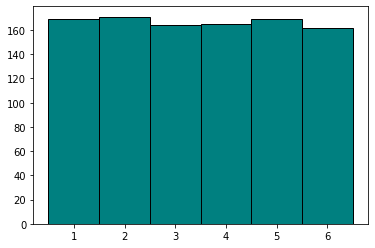

In [213]:
choice = ([1,2,3,4,5,6])
x = np.random.choice(choice,1000)
plt.hist(x,bins=range(1,8),align='left',width=1,color = 'teal',edgecolor='black')

In [231]:
stats.norm(5,1).rvs((3,5))

array([[4.87793691, 4.89103132, 5.55296666, 4.43048556, 7.62821993],
       [6.48788477, 5.02337463, 4.68267381, 4.27537948, 7.45415113],
       [5.11400317, 5.20440317, 4.95152451, 4.89348582, 5.11586345]])

In [232]:
from pydataset import data
mpg = data('mpg')
mpg['avg_mpg'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [248]:
from math import sqrt

#lets compare mpg of audi to all cars mpg
#null hypothesis: there is no difference in mpg for audi to all cars
#alternative hypothesis: audi has lower or higher mpg than all cars

#first, find mean of all cars
cars_mean = mpg.avg_mpg.mean()

#second, find mean of all audi cars
audis = mpg[mpg.manufacturer == 'audi']
audis_mean = audis.avg_mpg.mean()

#audis standard deviation
audis_std = audis.avg_mpg.std()

#sample size of audis
audis_size = audis.shape[0]

#audis degree of freedom
degf = audis_size - 1

#calculate error, stddev/sqrt(sample size)
std_error = audis_std/(sqrt(audis_size))

In [260]:
#now we can plug these values into the t-test formula
# t = (audi-avg - pop_avg)/std_error
t = (audis_mean - cars_mean)/std_error
t

3.9920282472823745

In [261]:
# The p value is the probability that we observed the t-statistic that we did, or a more extreme value
# multiply by 2 for two-tailed test
p = stats.t(degf).sf(t) * 2
p

0.0009433610083696983

In [262]:
from scipy.stats import ttest_ind

In [265]:
stats, p = ttest_ind(audis.avg_mpg,mpg.avg_mpg)
stats, p

(1.5660354824436589, 0.1186051864403576)

In [266]:
if p > .05:
    print("Reject null hypothesis.")
elif p < .05:
    print("Fail to reject null hypothesis.")

Reject null hypothesis.
